In [1]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords as stpw
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/eisti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/eisti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Loads data from CSV file.**

In [2]:
data = pd.read_csv("SMS_source.csv")
data.head()

,classes,contents
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Processing

In [3]:
def preprocess(content):
    content = content.lower()
    content = content.translate(str.maketrans("","", string.punctuation))
    content = re.sub(r'\d+ *|\b[a-z]\b *', "", content) # remove isolated letters
    content = content.strip()
    tokens = word_tokenize(content)
    stopwords = set(stpw.words("english"))
    content = " ".join(
        list(dict.fromkeys([t for t in tokens if not t in stopwords]))
    )
    return content

In [4]:
data.contents = data.contents.apply(preprocess)

In [5]:
data.head()

,classes,contents
0,ham,go jurong point crazy available bugis great wo...
1,ham,ok lar joking wif oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,dun say early hor already
4,ham,nah dont think goes usf lives around though


In [6]:
spam = data[data.classes == "spam"]
print("Size: ", len(spam))
spam.head()

Size:  747


,classes,contents
2,spam,free entry wkly comp win fa cup final tkts st ...
5,spam,freemsg hey darling weeks word back id like fu...
8,spam,winner valued network customer selected receiv...
9,spam,mobile months entitled update latest colour mo...
11,spam,six chances win cash pounds txt cshand send co...


In [7]:
no_spam = data[data.classes == "ham"]
print("Size: ", len(no_spam))
no_spam.head()

Size:  4827


,classes,contents
0,ham,go jurong point crazy available bugis great wo...
1,ham,ok lar joking wif oni
3,ham,dun say early hor already
4,ham,nah dont think goes usf lives around though
6,ham,even brother like speak treat aids patent


### Spam SMS Analysis 

In [8]:
spam_contents = (" ".join(spam.contents)).split(" ")
print("Number of words: ", len(spam_contents))

Number of words:  9882


In [9]:
uniq_words = list(dict.fromkeys(spam_contents))
freq_word_spam = pd.DataFrame(
    {
        'word': uniq_words,
        'occurence': [ spam_contents.count(word) for word in uniq_words],
    }
)

In [10]:
freq_word_spam = freq_word_spam.sort_values(by="occurence", ascending=False)
print("Number of unique words: ", len(freq_word_spam))
freq_word_spam.head()

Number of unique words:  2247


,word,occurence
45,call,319
0,free,169
14,txt,142
95,ur,114
44,claim,108


In [11]:
sub_freg_word_spam = freq_word_spam[:10] # 10 words with the more occurences.
# print(f"Number of words with more occurences: {len(sub_freg_word_spam)}.")

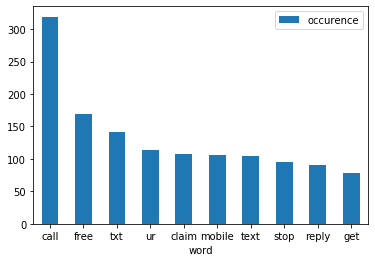

In [12]:
sub_freg_word_spam.plot.bar(x="word", y="occurence", rot=0)

### Ham SMS Analysis

In [13]:
no_spam_contents = (" ".join(no_spam.contents)).split(" ")
print("Number of words: ", len(no_spam_contents))

Number of words:  36067


In [14]:
uniq_words = list(dict.fromkeys(no_spam_contents))
freq_word_ham = pd.DataFrame(
    {
        'word': list(dict.fromkeys(no_spam_contents)),
        'occurence': [ no_spam_contents.count(word) for word in list(dict.fromkeys(no_spam_contents))],
    }
)

In [15]:
freq_word_ham = freq_word_ham.sort_values(by="occurence", ascending=False)
freq_word_ham.head()

,word,occurence
52,im,413
235,get,286
14,ok,265
25,dont,237
11,got,233


In [16]:
sub_freg_word_ham = freq_word_ham[:10] # 10 words with the more occurences.
# print(f"Number of words with more occurences: {len(sub_freg_word_ham)}.")

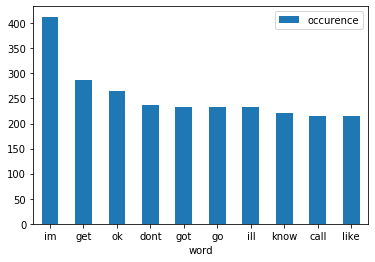

In [17]:
sub_freg_word_ham.plot.bar(x="word", y="occurence", rot=0)